In [1]:
import sys
import os
import os.path as op

import numpy as np
import pandas as pd
import datetime
import netCDF4 as netcdf
from datetime import timedelta
from math import pi
import xarray as xr
import glob

# dev library
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..'))

# dependencies
from lib import plot_sat
from lib.config import * 


# Diagnostic Figures

In [2]:
ds_data = xr.open_dataset(op.join(p_output, 'ds_dataTracks.nc'))[['longitude', 'latitude']]
ds_energy = xr.open_dataset(op.join(p_output, 'energy_BINS.nc'))[['distance']]
ds_params = xr.open_dataset(op.join(p_output, 'params_BINS.nc'))

In [3]:
ds_params = ds_params.sel(k=slice(2*np.pi/500, 2*np.pi/70))

In [4]:
ds = xr.combine_by_coords([ds_data, ds_params])

In [5]:
ds

<xarray.Dataset>
Dimensions:     (dp: 72, file: 151, k: 13, nbox: 501, posneg: 2)
Coordinates:
  * file        (file) object 'CFO_OP05_SWI_L2_____F_20210120T001953_20210120...
  * nbox        (nbox) int64 7 8 9 10 11 12 13 ... 501 502 503 504 505 506 507
  * dp          (dp) int64 0 5 10 15 20 25 30 35 ... 325 330 335 340 345 350 355
  * k           (k) float64 0.032 0.03368 0.03555 ... 0.06387 0.07094 0.07976
  * posneg      (posneg) int64 0 1
Data variables:
    bearing_p1  (file, nbox, posneg) float64 nan nan nan nan ... nan nan nan nan
    H           (file, posneg, nbox, dp, k) float64 nan nan nan ... nan nan nan
    Date        (file, k, nbox, posneg) datetime64[ns] NaT NaT NaT ... NaT NaT
    longitude   (file, nbox, posneg) float32 ...
    latitude    (file, nbox, posneg) float32 ...

### Bins distance along great circle to Samoa

In [6]:
sel_df = ds[['H', 'longitude', 'latitude']].to_dataframe().dropna()

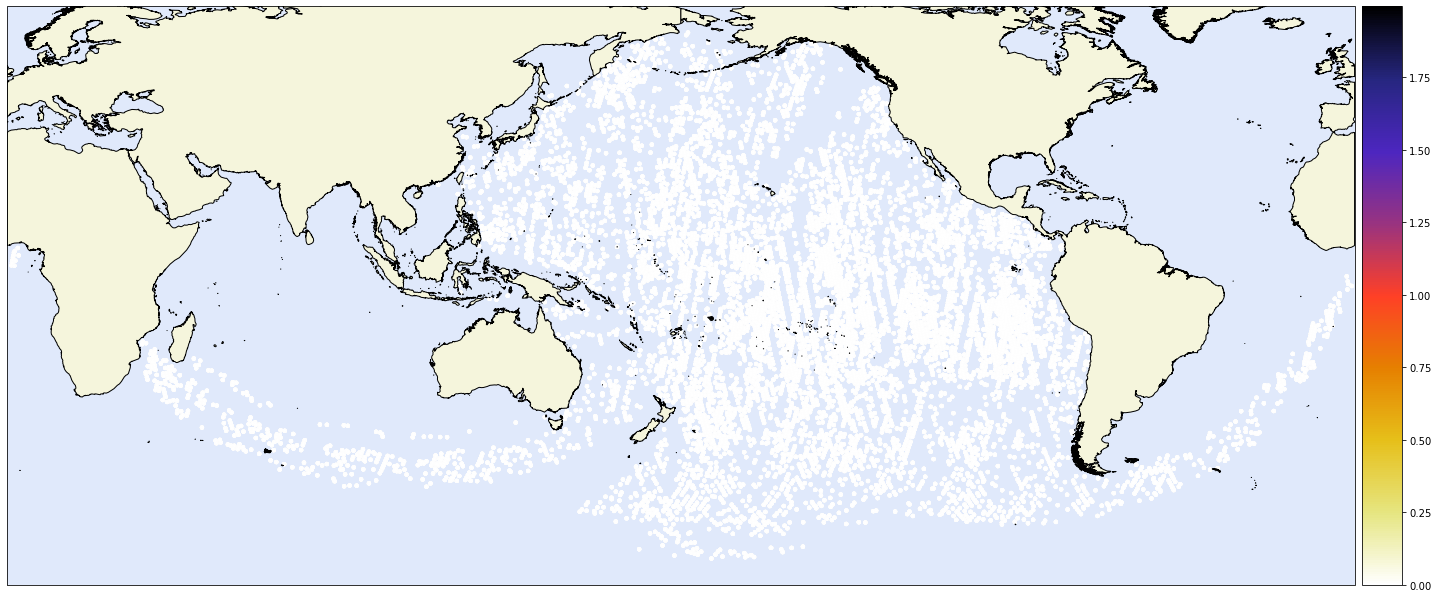

In [8]:
figsize=(25,15)
#title = 'Energy arriving to Samoa in time frame {0} - {1}'.format(time_ini, time_fin)
title=''
cmap = 'CMRmap_r'
vmin, vmax = 0, sel_df.H.max()
fig, ax = plot_sat.attrs_map(
                            sel_df.longitude.values, 
                            sel_df.latitude.values, 
                            sel_df['H'].values, figsize, title,
                            cmap, vmin, vmax
)

In [6]:
sel_df = ds[['', 'longitude', 'latitude']].to_dataframe().dropna()

In [ ]:
#sel_df = sel_df.loc[(sel_df.H > 0) & (sel_df.distance > 6000000) & (sel_df.distance < 7000000)].sort_values('H')

In [35]:
sel_date = ds[['Date', 'H']].to_dataframe().dropna().sort_values('Date')

In [36]:
sel_date

Date  \
dp  file                                               k        nbox posneg                                 
240 CFO_OP05_SWI_L2_____F_20210123T060504_20210123T... 0.018002 332  0      2021-01-23 18:22:11.818186998   
                                                       0.023439 332  0      2021-01-23 19:57:48.871254650   
                                                       0.028875 332  0      2021-01-23 21:22:50.920664015   
95  CFO_OP05_SWI_L2_____F_20210122T171312_20210122T... 0.018002 177  0      2021-01-23 22:16:07.013152702   
240 CFO_OP05_SWI_L2_____F_20210123T060504_20210123T... 0.034311 332  0      2021-01-23 22:40:11.315722902   
...                                                                                                   ...   
30  CFO_OP05_SWI_L2_____F_20210125T071023_20210125T... 0.061493 107  0      2021-02-25 06:22:27.391062522   
                                                                     1      2021-02-25 07:25:17.662929632   
                                                                104  1      2021-02-25 16:58:30.337061499   
25  CFO_OP05_SWI_L2_____F_20210126T065552_20210126T... 0.056057 100  0      2021-02-26 00:14:00.860178846   
                                                       0.061493 100  0      2021-02-27 11:08:38.180308561   

                                                                               H  
dp  file                                               k        nbox posneg       
240 CFO_OP05_SWI_L2_____F_20210123T060504_20210123T... 0.018002 332  0       0.0  
                                                       0.023439 332  0       0.0  
                                                       0.028875 332  0       0.0  
95  CFO_OP05_SWI_L2_____F_20210122T171312_20210122T... 0.018002 177  0       0.0  
240 CFO_OP05_SWI_L2_____F_20210123T060504_20210123T... 0.034311 332  0       0.0  
...                                                                          ...  
30  CFO_OP05_SWI_L2_____F_20210125T071023_20210125T... 0.061493 107  0       0.0  
                                                                     1       0.0  
                                                                104  1       0.0  
25  CFO_OP05_SWI_L2_____F_20210126T065552_20210126T... 0.056057 100  0       0.0  
                                                       0.061493 100  0       0.0  

[28582 rows x 2 columns]

In [ ]:
import matplotlib.pyplot as plt

In [23]:
sel_date = sel_date.reset_index()

In [27]:
s = sel_date.loc[sel_date.dp == 25]

In [37]:
sel_date

Date  \
dp  file                                               k        nbox posneg                                 
240 CFO_OP05_SWI_L2_____F_20210123T060504_20210123T... 0.018002 332  0      2021-01-23 18:22:11.818186998   
                                                       0.023439 332  0      2021-01-23 19:57:48.871254650   
                                                       0.028875 332  0      2021-01-23 21:22:50.920664015   
95  CFO_OP05_SWI_L2_____F_20210122T171312_20210122T... 0.018002 177  0      2021-01-23 22:16:07.013152702   
240 CFO_OP05_SWI_L2_____F_20210123T060504_20210123T... 0.034311 332  0      2021-01-23 22:40:11.315722902   
...                                                                                                   ...   
30  CFO_OP05_SWI_L2_____F_20210125T071023_20210125T... 0.061493 107  0      2021-02-25 06:22:27.391062522   
                                                                     1      2021-02-25 07:25:17.662929632   
                                                                104  1      2021-02-25 16:58:30.337061499   
25  CFO_OP05_SWI_L2_____F_20210126T065552_20210126T... 0.056057 100  0      2021-02-26 00:14:00.860178846   
                                                       0.061493 100  0      2021-02-27 11:08:38.180308561   

                                                                               H  
dp  file                                               k        nbox posneg       
240 CFO_OP05_SWI_L2_____F_20210123T060504_20210123T... 0.018002 332  0       0.0  
                                                       0.023439 332  0       0.0  
                                                       0.028875 332  0       0.0  
95  CFO_OP05_SWI_L2_____F_20210122T171312_20210122T... 0.018002 177  0       0.0  
240 CFO_OP05_SWI_L2_____F_20210123T060504_20210123T... 0.034311 332  0       0.0  
...                                                                          ...  
30  CFO_OP05_SWI_L2_____F_20210125T071023_20210125T... 0.061493 107  0       0.0  
                                                                     1       0.0  
                                                                104  1       0.0  
25  CFO_OP05_SWI_L2_____F_20210126T065552_20210126T... 0.056057 100  0       0.0  
                                                       0.061493 100  0       0.0  

[28582 rows x 2 columns]

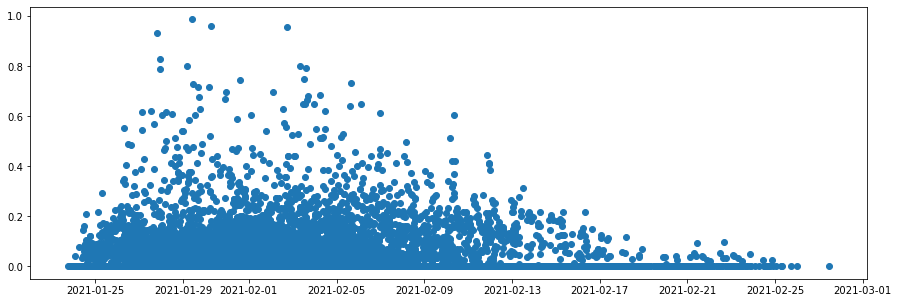

In [29]:
plt.figure(figsize=(15,5))
plt.scatter(sel_date.Date, sel_date.H)

In [5]:
df = ds.where((ds.bearing_p1 < 90) & (ds.bearing_p1 > 45) & (ds.longitude > -150) & (ds.longitude < -120) & (ds.latitude > 8) & (ds.latitude < 40))

ValueError: 'c' argument has 98043696 elements, which is inconsistent with 'x' and 'y' with size 151302.

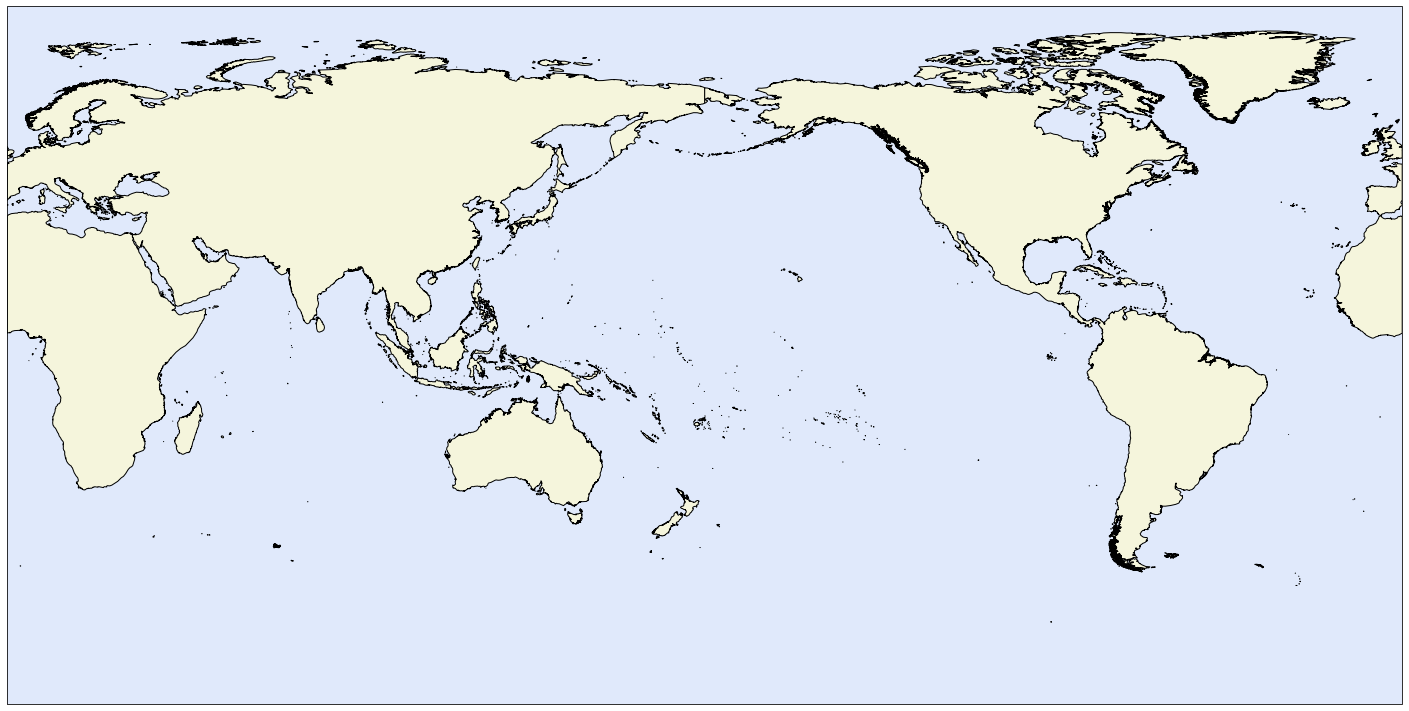

In [7]:
figsize=(25,15)
#title = 'Energy arriving to Samoa in time frame {0} - {1}'.format(time_ini, time_fin)
title=''
cmap = 'CMRmap_r'
vmin, vmax = 0, 0.5
fig, ax = plot_sat.attrs_map(
                            sel_df.longitude.values, 
                            sel_df.latitude.values, 
                            sel_df['H'].values, figsize, title,
                            cmap, vmin, vmax
)

In [28]:
sel_df = ds[['Date', 'longitude', 'latitude']].to_dataframe().dropna()

In [42]:
sel_df['Num_date'] = sel_df['Date'].astype('datetime64').astype(int).astype(float)

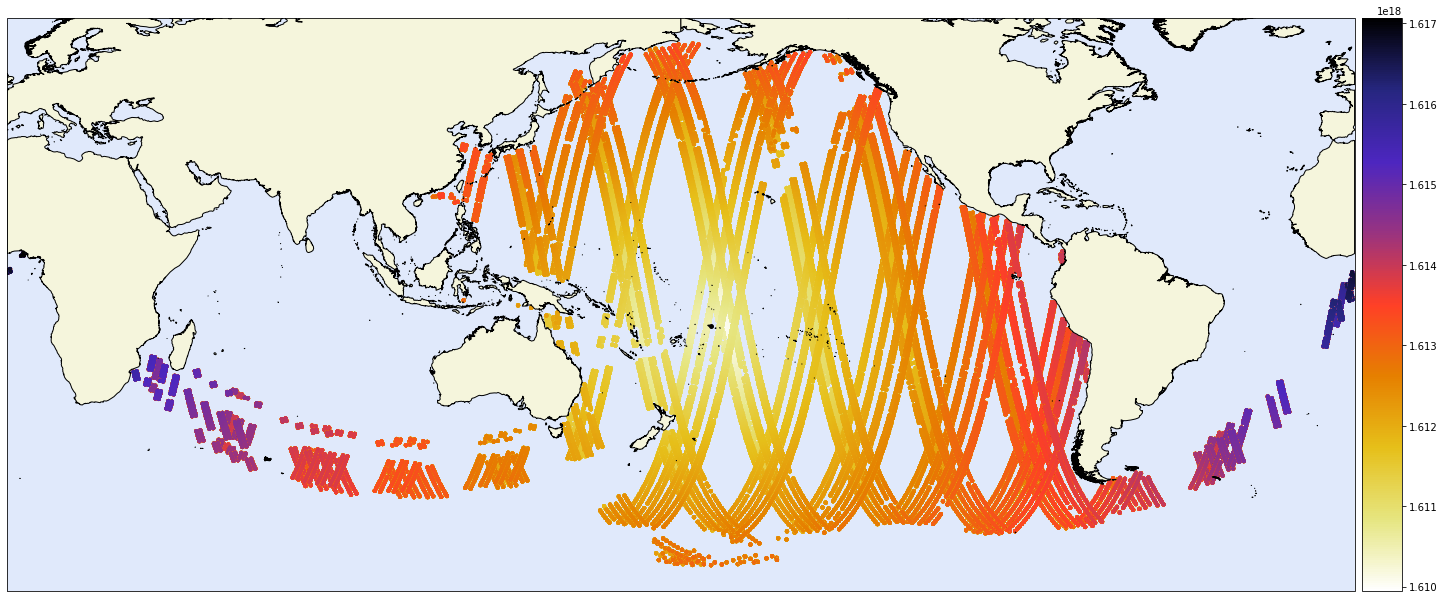

In [46]:
figsize=(25,15)
#title = 'Energy arriving to Samoa in time frame {0} - {1}'.format(time_ini, time_fin)
title=''
cmap = 'CMRmap_r'
vmin, vmax = None, None
fig, ax = plot_sat.attrs_map(
                            sel_df.longitude.values, 
                            sel_df.latitude.values, 
                            sel_df['Num_date'].values, figsize, title,
                            cmap, vmin, vmax
)

In [ ]:
sys.exit()

___

## Instant satellite energy measured 

In [6]:
part_k = ds_params[['SWH(m)', 'H_sinNu']]
part_k_coords = xr.combine_by_coords([part_k, ds_data])

In [ ]:
DF = pd.DataFrame()
for pfile, file in enumerate(part_k_coords.file.values):
    df_file = part_k_coords.isel(file=0).to_dataframe().dropna()
    DF.append(df_file.loc[(df_file.time > time_ini) & (df_file.time < time_fin)])
    

### WW3 Model output

In [ ]:
glob.glob(op.join(ww3_path, 'MARC_WW3-GLOB-30M_20210223*'))

In [ ]:
for file in os.listdir(ww3_path):
    date = file.split('WW3-GLOB-30M_')[1][:-3]
    date = np.datetime64(pd.to_datetime(date))

    if (date >= time_ini) & (date <= time_fin):
        print(date)
        break
file_ww3 = xr.open_dataset(op.join(ww3_path, file))

**Hs**

In [ ]:
df_ww3 = file_ww3[['hs']].to_dataframe().dropna().reset_index()

figsize=(7,7)
title = 'Energy in time frame {0} - {1}'.format(time_ini, time_fin)
cmap = 'CMRmap_r'
vmin, vmax = 0, 6#df_ww3.hs.max()
fig, ax = plot_sat.attrs_map(
                            df_ww3.longitude.values, 
                            df_ww3.latitude.values, 
                            df_ww3['hs'].values, figsize, title,
                            cmap, vmin, vmax, 
)
ax.set_extent([site_lon-15, site_lon+15, site_lat-15, site_lat+15])

**T02**

In [ ]:
df_ww3 = file_ww3[['t02']].to_dataframe().dropna().reset_index()

figsize=(7,7)
title = 'Energy in time frame {0} - {1}'.format(time_ini, time_fin)
cmap = 'jet'
vmin, vmax = 0, 10#df_ww3.t02.max()
fig, ax = plot_sat.attrs_map(
                            df_ww3.longitude.values, 
                            df_ww3.latitude.values, 
                            df_ww3['t02'].values, figsize, title,
                            cmap, vmin, vmax, 
)
ax.set_extent([site_lon-15, site_lon+15, site_lat-15, site_lat+15])

**Dir**

In [ ]:
df_ww3 = file_ww3[['dp']].to_dataframe().dropna().reset_index()

figsize=(7,7)
title = 'Energy in time frame {0} - {1}'.format(time_ini, time_fin)
cmap = 'hsv'
vmin, vmax = 0, df_ww3.dp.max()
fig, ax = plot_sat.attrs_map(
                            df_ww3.longitude.values, 
                            df_ww3.latitude.values, 
                            df_ww3['dp'].values, figsize, title,
                            cmap, vmin, vmax, 
)
ax.set_extent([site_lon-15, site_lon+15, site_lat-15, site_lat+15])